In [1]:
import pandas as pd


In [2]:
data=pd.read_csv("Electric_Vehicle_Population_Data.csv")
print(data.head)

<bound method NDFrame.head of         VIN (1-10)     County           City State  Postal Code  Model Year  \
0       5YJYGDEE1L       King        Seattle    WA      98122.0        2020   
1       7SAYGDEE9P  Snohomish        Bothell    WA      98021.0        2023   
2       5YJSA1E4XK       King        Seattle    WA      98109.0        2019   
3       5YJSA1E27G       King       Issaquah    WA      98027.0        2016   
4       5YJYGDEE5M     Kitsap      Suquamish    WA      98392.0        2021   
...            ...        ...            ...   ...          ...         ...   
177861  7SAYGDEE3N     Pierce    Bonney Lake    WA      98391.0        2022   
177862  KM8K23AG1P      Mason        Shelton    WA      98584.0        2023   
177863  5YJYGDEE6M      Grant         Quincy    WA      98848.0        2021   
177864  WVGKMPE27M       King  Black Diamond    WA      98010.0        2021   
177865  5YJ3E1EA8M     Pierce         Tacoma    WA      98422.0        2021   

              Make   

In [3]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   County                                             177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177861 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177866 non-null  object 
 7   Model                                              177866 non-null  object 
 8   Electric Vehicle Type                              177866 non-null  object

In [4]:
data.isnull().sum()

VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 389
DOL Vehicle ID                                         0
Vehicle Location                                       9
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64

In [5]:
data=data.dropna()

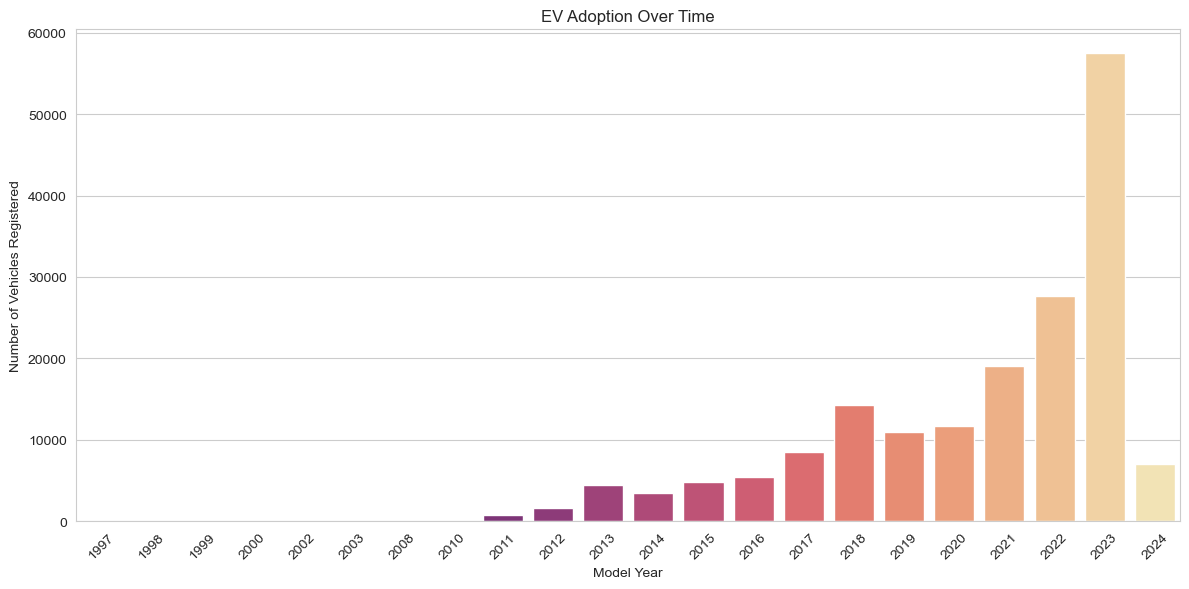

In [6]:
##EV Adoption Over Time: Analyze the growth of the EV population by model year.
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

plt.figure(figsize=(12,6))
ev_adop=data['Model Year'].value_counts().sort_index()
sns.barplot(x=ev_adop.index,y=ev_adop.values, palette='magma')
plt.title("EV Adoption Over Time")
plt.xlabel("Model Year")
plt.ylabel("Number of Vehicles Registered")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [7]:
#From the above bar chart, it’s clear that EV adoption has been increasing over time,
#especially noting a significant upward trend starting around 2016. The number of vehicles registered
#grows modestly up until that point and then begins to rise more rapidly from 2017 onwards.
#The year 2023 shows a particularly sharp increase in the number of registered EVs,
#with the bar for 2023 being the highest on the graph, indicating a peak in EV adoption.

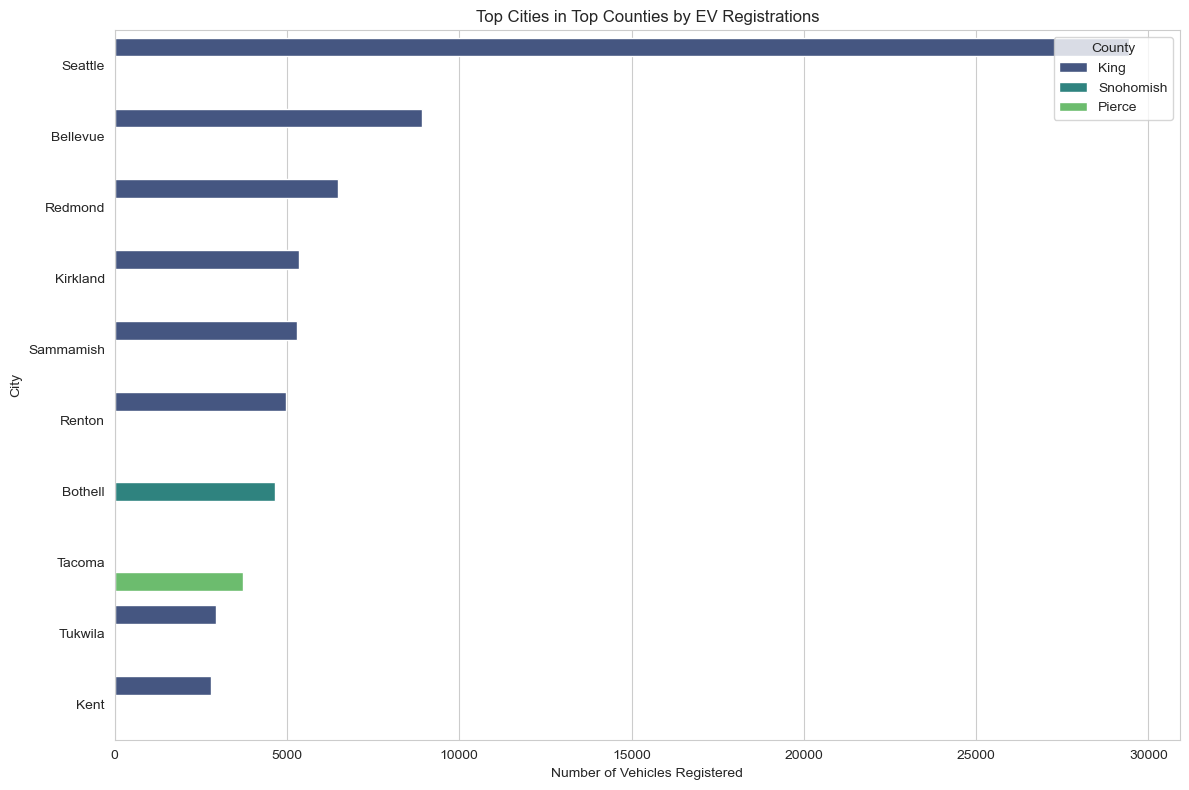

In [8]:
#Geographical Distribution: Understand where EVs are most commonly registered (e.g., by county or city)
ev_geo=data['County'].value_counts()
top_county=ev_geo.head(3).index
top_county_data=data[data['County'].isin(top_county)]
ev_city_distribution_top_counties = top_county_data.groupby(['County', 'City']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')
top_cities = ev_city_distribution_top_counties.head(10)
plt.figure(figsize=(12,8))
sns.barplot(x="Number of Vehicles",y="City",hue="County",data=top_cities,palette="viridis")
plt.title("Top Cities in Top Counties by EV Registrations")
plt.xlabel("Number of Vehicles Registered")
plt.ylabel("City")
plt.legend(title='County')
plt.tight_layout()
plt.show()

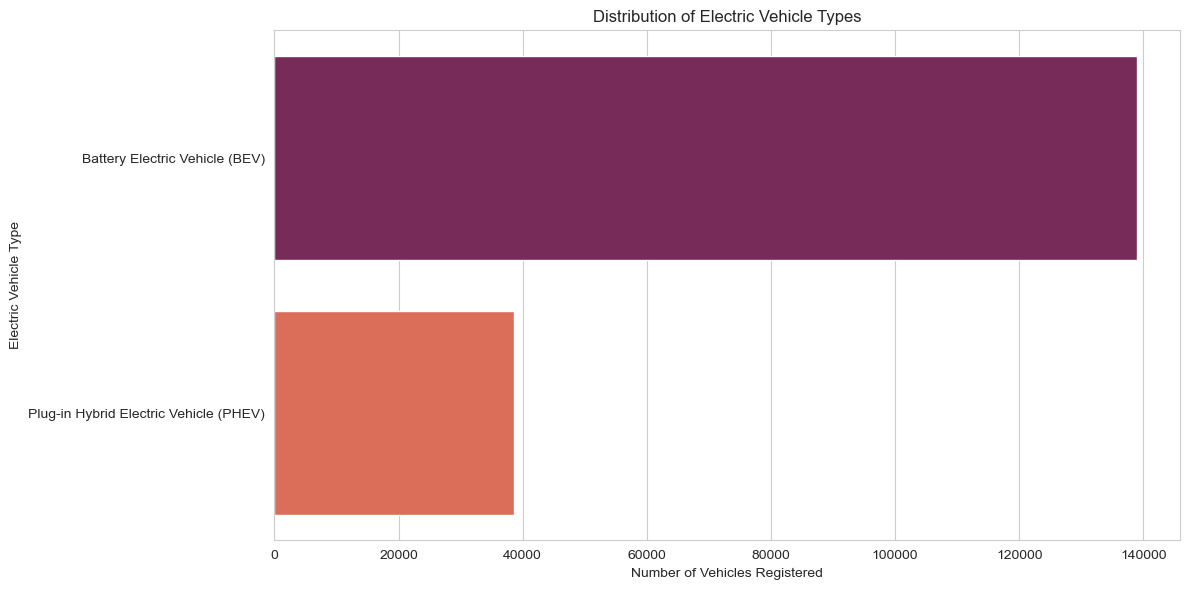

In [9]:
#EV Types: Breakdown of the dataset by electric vehicle type 
#like Battery Electric Vehicles (BEV) and Plug-in Hybrid Electric Vehicles (PHEV)
ev_type=data['Electric Vehicle Type'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(x=ev_type.values, y=ev_type.index, palette='rocket')
plt.title("Distribution of Electric Vehicle Types")
plt.xlabel("Number of Vehicles Registered")
plt.ylabel("Electric Vehicle Type")
plt.tight_layout()
plt.show()

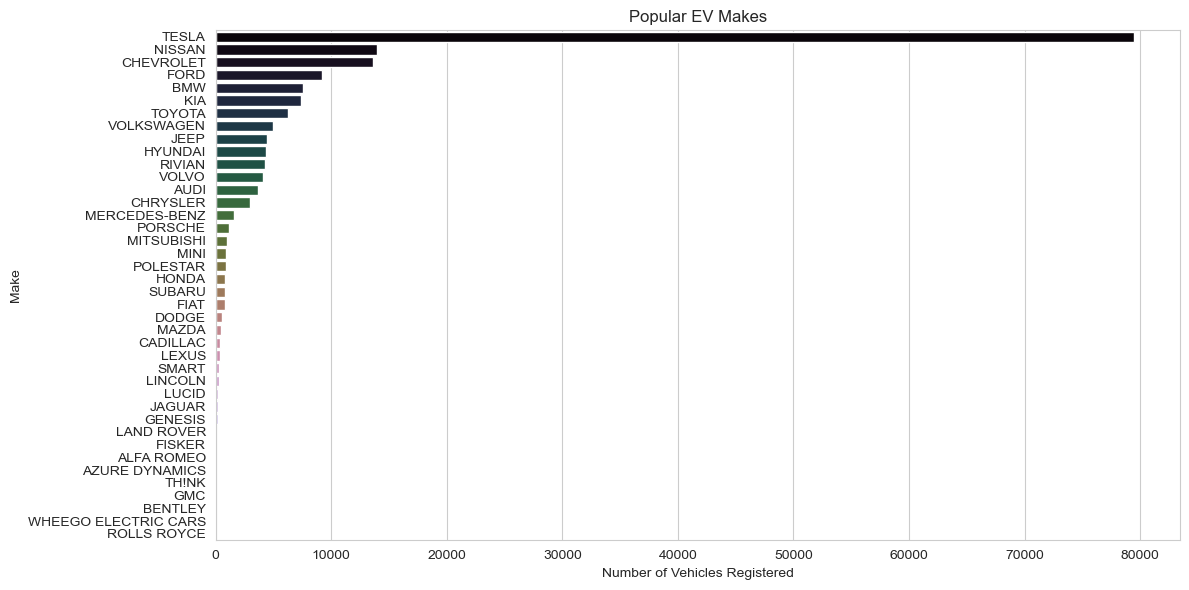

In [12]:
# Make and Model Popularity: Identify the most popular makes and models among the registered EVs
ev_make1=data['Make'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(x=ev_make.values,y=ev_make.index, palette='cubehelix')
plt.title("Popular EV Makes")
plt.xlabel("Number of Vehicles Registered")
plt.ylabel("Make")
plt.tight_layout()
plt.show()

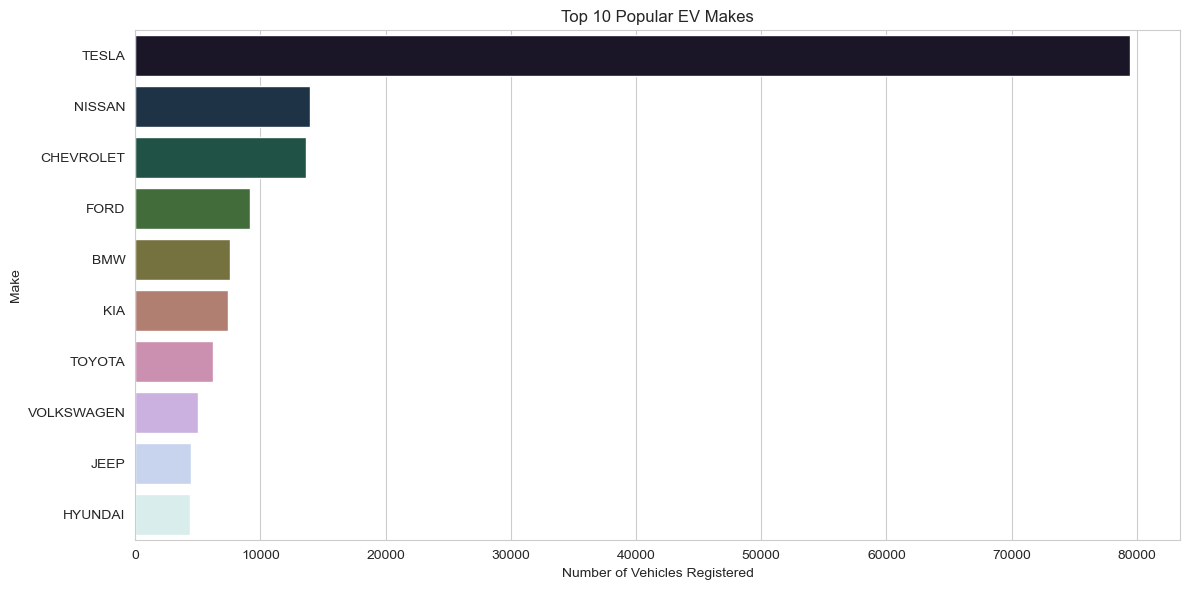

In [14]:
# Make and Model Popularity: Identify the most popular makes and models among the registered EVs
ev_make=data['Make'].value_counts().head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=ev_make.values,y=ev_make.index, palette='cubehelix')
plt.title("Top 10 Popular EV Makes")
plt.xlabel("Number of Vehicles Registered")
plt.ylabel("Make")
plt.tight_layout()
plt.show()

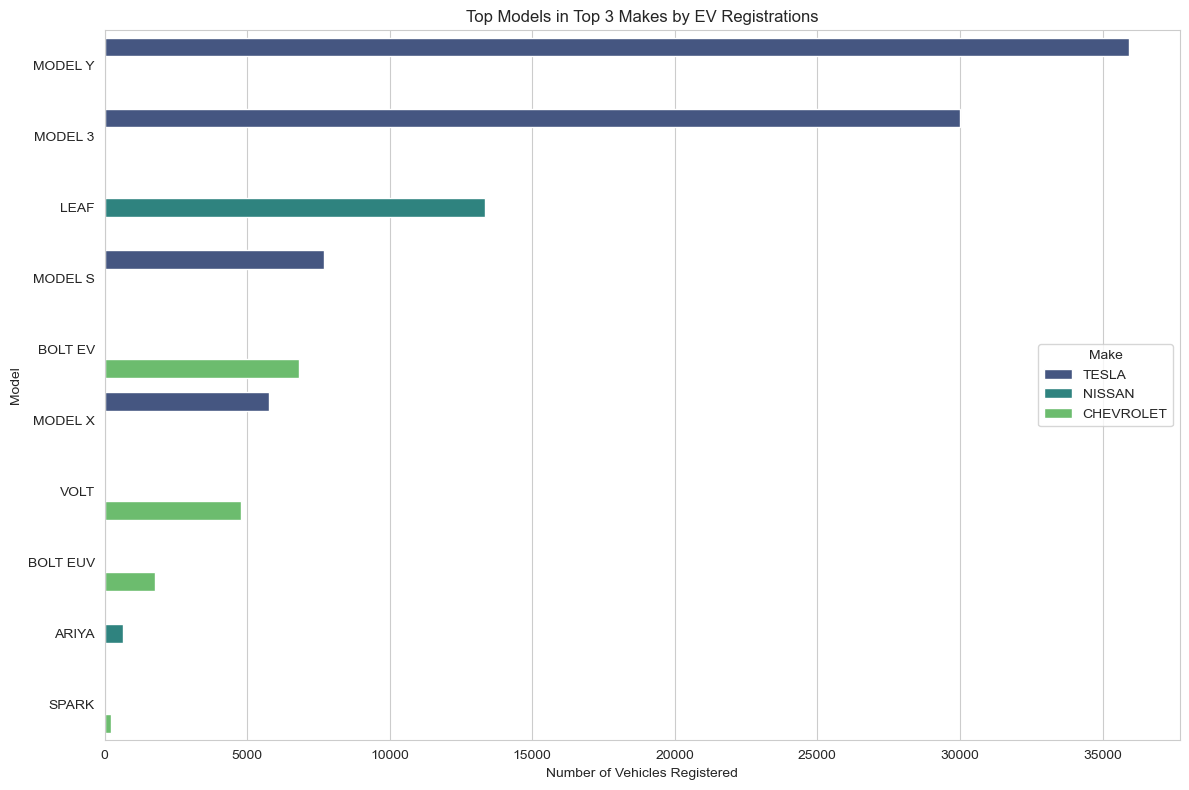

In [18]:
#Model
ev_model=ev_make.head(3).index
ev_model_distribution=data[data['Make'].isin(ev_model) ]
ev_model_top=ev_model_distribution.groupby(['Make','Model']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')
top_models=ev_model_top.head(10)
plt.figure(figsize=(12,8))
sns.barplot(x='Number of Vehicles',y='Model', hue ='Make',data=top_models,palette='viridis')
plt.title("Top Models in Top 3 Makes by EV Registrations")
plt.xlabel("Number of Vehicles Registered")
plt.ylabel("Model")
plt.tight_layout()
plt.show()

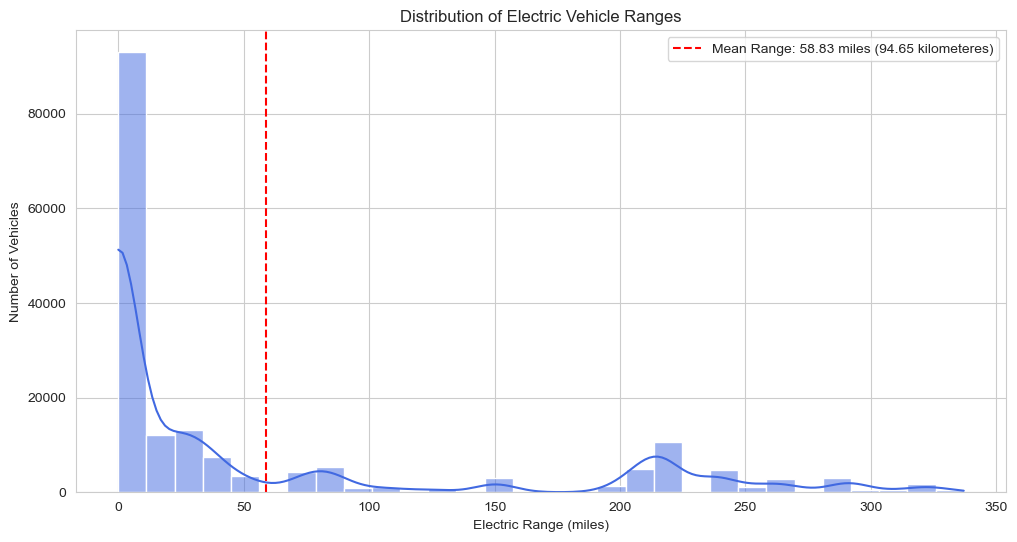

In [29]:
#Electric Range Analysis: The electric range indicates how far an EV can travel on a single charge,
#and how advancements in battery technology have been steadily increasing these ranges over the years.
plt.figure(figsize=(12,6))
sns.histplot(data['Electric Range'],bins=30,kde=True,color='royalblue')
plt.title('Distribution of Electric Vehicle Ranges')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Number of Vehicles')
plt.axvline(data['Electric Range'].mean(), color='red', linestyle='--', label=f'Mean Range: {data["Electric Range"].mean():.2f} miles ({data["Electric Range"].mean()*1.609:.2f} kilometeres)')
plt.legend()
plt.show()



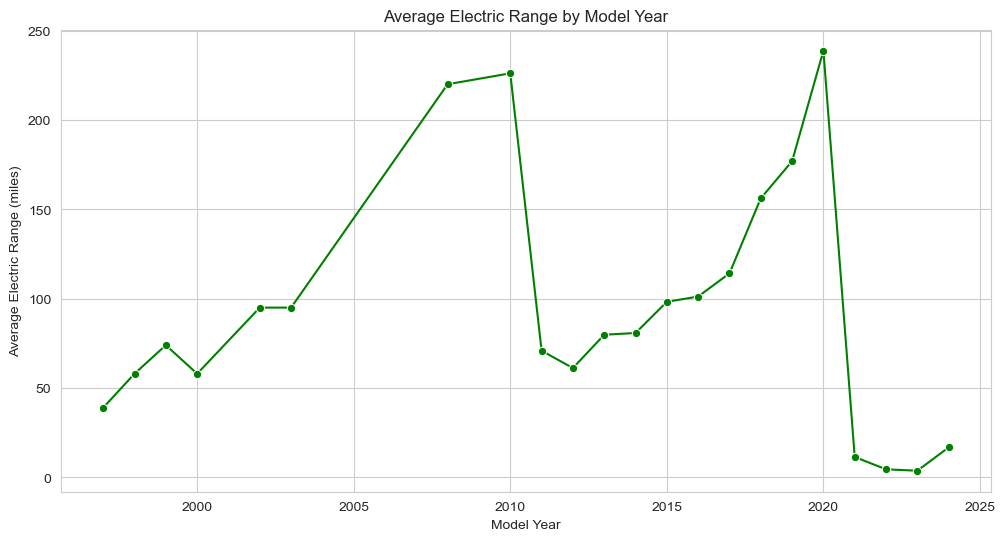

In [30]:
#Average Electric Range by Model Year
average_range = data.groupby('Model Year')['Electric Range'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x='Model Year', y='Electric Range', data=average_range, marker='o', color='green')
plt.title('Average Electric Range by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Average Electric Range (miles)')
plt.grid(True)
plt.show()

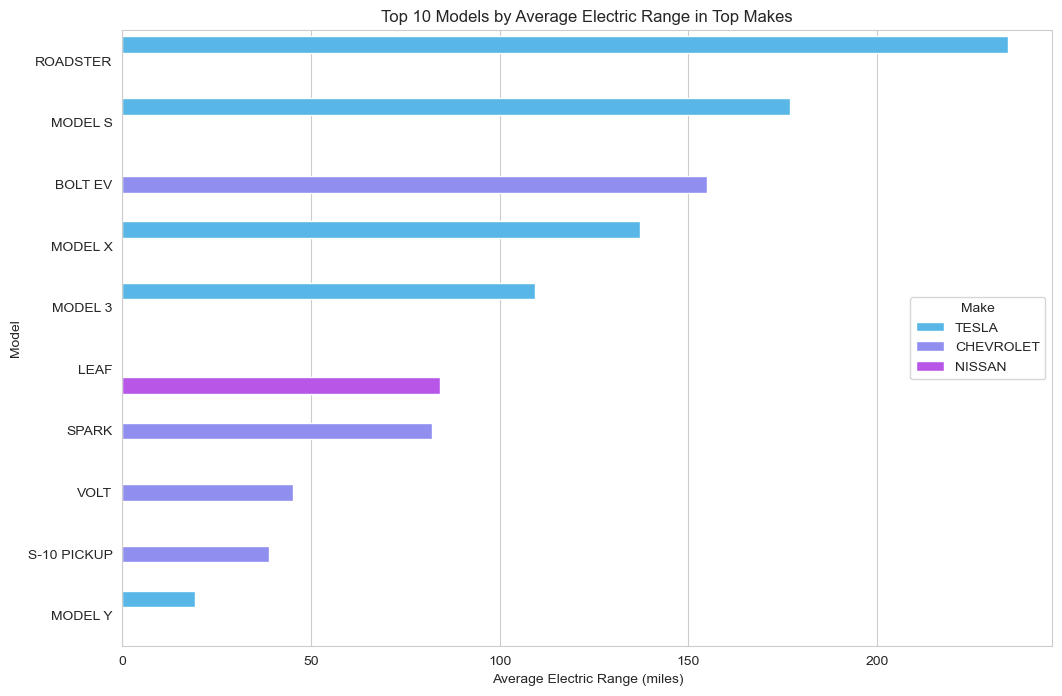

In [31]:
# How electric ranges vary among the top manufacturers and models.
range_by_model=ev_model_distribution.groupby(['Make','Model'])['Electric Range'].mean().sort_values(ascending=False).reset_index()
top_range_models=range_by_model.head(10)
plt.figure(figsize=(12,8))
sns.barplot(x='Electric Range',y='Model',hue='Make',data=top_range_models,palette='cool')
plt.title('Top 10 Models by Average Electric Range in Top Makes')
plt.xlabel('Average Electric Range (miles)')
plt.ylabel('Model')
plt.legend(title='Make', loc='center right')
plt.show()

# Estimated Market Size Analysis of Electric Vehicles in the United States

In [37]:
# Number of EVs registered each year
ev_year=data['Model Year'].value_counts().sort_index()
print(ev_year)
# 2024 contains data only till March

Model Year
1997        1
1998        1
1999        5
2000        7
2002        2
2003        1
2008       19
2010       23
2011      775
2012     1614
2013     4399
2014     3496
2015     4826
2016     5469
2017     8534
2018    14286
2019    10913
2020    11740
2021    19063
2022    27708
2023    57519
2024     7072
Name: count, dtype: int64


In [47]:
from scipy.optimize import curve_fit
import numpy as np
import pandas as pd
filtered=ev_year[ev_year.index<=2023]
def exp_growth(x,a,b):
    return a*np.exp(b*x)
x_data=filtered.index-filtered.index.min()
y_data=filtered.values
params,covariance=curve_fit(exp_growth,x_data,y_data)
forecast_years=np.arange(2024,2024+6)-filtered.index.min()
forecasted_values=exp_growth(forecast_years,*params).round()
forecasted_df=pd.DataFrame(forecasted_values,forecast_years+filtered.index.min())
forecasted_df.columns=['Forecasted Values']
print(forecasted_df)

      Forecasted Values
2024            79079.0
2025           119654.0
2026           181047.0
2027           273941.0
2028           414497.0
2029           627171.0


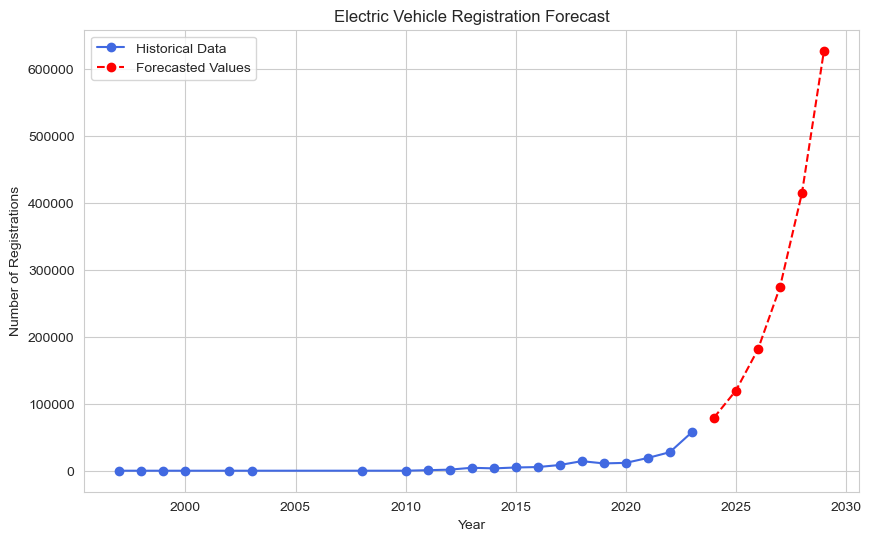

In [50]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(filtered.index, filtered.values, label='Historical Data', color='royalblue', marker='o')
plt.plot(forecasted_df.index, forecasted_df['Forecasted Values'], label='Forecasted Values', color='red', linestyle='--', marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Registrations')
plt.title('Electric Vehicle Registration Forecast')
plt.legend()
plt.grid(True)
plt.show()
